In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from clases.NeuronalNetwork import SimpleNeuralNetwork
from clases.Optimizer import SGDOptimizer, AdamOptimizer
from clases.Trainer import Trainer
from clases.LossFunction import *
from clases.ActivationFunction import *
from clases.Test import *

import warnings
warnings.filterwarnings("ignore")

## MNIST Data

### Load Data

In [198]:
data = pd.read_csv('../datos/mnist_data.csv')
data = np.array(data)

### Split Data

In [199]:
m, n = data.shape
np.random.shuffle(data)

test_size = int(0.1 * m)
data_test = data[:test_size, :].T  # El 10% inicial para el conjunto de prueba

# El conjunto provisional restante (90%)
remaining_data = data[test_size:, :]

train_size = int(0.8 * m)
data_train = remaining_data[:train_size, :].T  # El siguiente 80% para entrenamiento
data_validation = remaining_data[train_size:, :].T  # El resto 10% para validación

X_train, Y_train = data_train[1:], data_train[0].astype(int)
X_val, Y_val = data_validation[1:], data_validation[0].astype(int)
X_test, Y_test = data_test[1:], data_test[0].astype(int)

### Train Data

#### SGD Optimizer

In [200]:
model = SimpleNeuralNetwork(input_size=784, output_size=10, activation_function=relu, activation_function_d=relu_derivative, output_function=softmax)
optimizer = SGDOptimizer(learning_rate=0.001)
trainer = Trainer(model, optimizer, cross_entropy_loss)
trainer.train(X_train, Y_train,X_val,Y_val, epochs=130)

--------------------------------------------------------------------
| Epoch   0 | time:  0.18s | val loss 2.352 | valid accuracy 0.101 |
--------------------------------------------------------------------
| Epoch  10 | time:  0.23s | val loss 1.899 | valid accuracy 0.369 |
--------------------------------------------------------------------
| Epoch  20 | time:  0.20s | val loss 1.378 | valid accuracy 0.591 |
--------------------------------------------------------------------
| Epoch  30 | time:  0.17s | val loss 1.019 | valid accuracy 0.710 |
--------------------------------------------------------------------
| Epoch  40 | time:  0.19s | val loss 0.820 | valid accuracy 0.765 |
--------------------------------------------------------------------
| Epoch  50 | time:  0.22s | val loss 0.709 | valid accuracy 0.794 |
--------------------------------------------------------------------
| Epoch  60 | time:  0.19s | val loss 0.640 | valid accuracy 0.812 |
----------------------------------

In [201]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(X_test, model)
accuracy = np.mean(Y_pred == Y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.8657142857142858


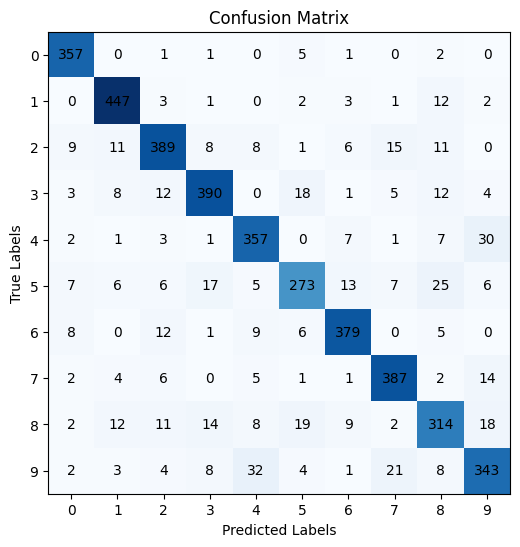

In [202]:
confusion_matrix(Y_test, Y_pred, class_labels=range(10))

#### Adam Optimizer

In [203]:
model = SimpleNeuralNetwork(input_size=784, output_size=10, activation_function=relu, activation_function_d=relu_derivative, output_function=softmax)
optimizer = AdamOptimizer(learning_rate=0.001)
trainer = Trainer(model, optimizer, cross_entropy_loss)
trainer.train(X_train, Y_train,X_val,Y_val, epochs=130)

--------------------------------------------------------------------
| Epoch   0 | time:  0.17s | val loss 2.180 | valid accuracy 0.194 |
--------------------------------------------------------------------
| Epoch  10 | time:  0.20s | val loss 1.054 | valid accuracy 0.670 |
--------------------------------------------------------------------
| Epoch  20 | time:  0.21s | val loss 0.555 | valid accuracy 0.827 |
--------------------------------------------------------------------
| Epoch  30 | time:  0.21s | val loss 0.429 | valid accuracy 0.875 |
--------------------------------------------------------------------
| Epoch  40 | time:  0.19s | val loss 0.369 | valid accuracy 0.893 |
--------------------------------------------------------------------
| Epoch  50 | time:  0.25s | val loss 0.334 | valid accuracy 0.906 |
--------------------------------------------------------------------
| Epoch  60 | time:  0.19s | val loss 0.312 | valid accuracy 0.913 |
----------------------------------

In [204]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(X_test, model)
accuracy = np.mean(Y_pred == Y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9302380952380952


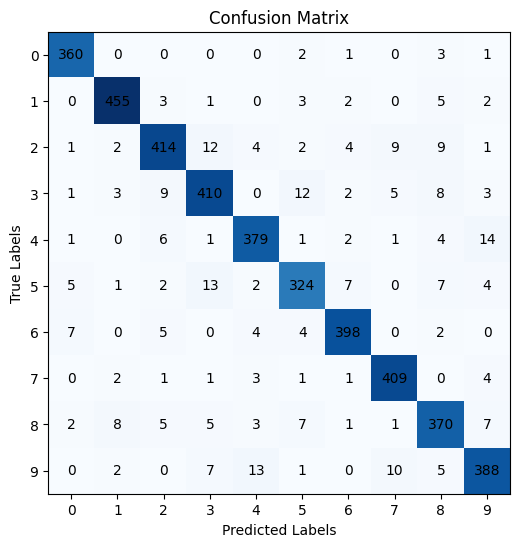

In [205]:
confusion_matrix(Y_test, Y_pred, class_labels=range(10))

## Iris Data

### Load the Data

In [283]:
data = pd.read_csv('../datos/Iris.csv')
data = np.array(data)

### Label Encoder

In [284]:
target_column = data[:, -1]

unique_classes, encoded_labels = np.unique(target_column, return_inverse=True)

data[:, -1] = encoded_labels

### Standard Scaler

In [286]:
features = data[:, :-1].astype(np.float64)

means = features.mean(axis=0)
stds = features.std(axis=0)

scaled_features = (features - means) / stds

data[:, :-1] = scaled_features

### Split Data

In [287]:
m, n = data.shape
np.random.shuffle(data)

test_size = int(0.1 * m)
data_test = data[:test_size, :].T  # El 10% inicial para el conjunto de prueba

# El conjunto provisional restante (90%)
remaining_data = data[test_size:, :]

train_size = int(0.8 * m)
data_train = remaining_data[:train_size, :].T  # El siguiente 80% para entrenamiento
data_validation = remaining_data[train_size:, :].T  # El resto 10% para validación

X_train, Y_train = data_train[:-1].astype(np.float64), data_train[-1].astype(int)
X_val, Y_val = data_validation[:-1].astype(np.float64), data_validation[-1].astype(int)
X_test, Y_test = data_test[:-1].astype(np.float64), data_test[-1].astype(int)

### Train Data

#### SGDOptimizer

In [288]:
model = SimpleNeuralNetwork(input_size=4, output_size=3, activation_function=relu, activation_function_d=relu_derivative, output_function=softmax)
optimizer = SGDOptimizer(learning_rate=1)
trainer = Trainer(model, optimizer, cross_entropy_loss)
trainer.train(X_train, Y_train,X_val,Y_val, epochs=130)

--------------------------------------------------------------------
| Epoch   0 | time:  0.00s | val loss 1.098 | valid accuracy 0.325 |
--------------------------------------------------------------------
| Epoch  10 | time:  0.00s | val loss 0.439 | valid accuracy 0.875 |
--------------------------------------------------------------------
| Epoch  20 | time:  0.00s | val loss 0.141 | valid accuracy 0.992 |
--------------------------------------------------------------------
| Epoch  30 | time:  0.00s | val loss 0.087 | valid accuracy 0.992 |
--------------------------------------------------------------------
| Epoch  40 | time:  0.00s | val loss 0.063 | valid accuracy 0.992 |
--------------------------------------------------------------------
| Epoch  50 | time:  0.00s | val loss 0.050 | valid accuracy 0.992 |
--------------------------------------------------------------------
| Epoch  60 | time:  0.00s | val loss 0.042 | valid accuracy 0.992 |
----------------------------------

In [289]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(X_test, model)
accuracy = np.mean(Y_pred == Y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 1.0


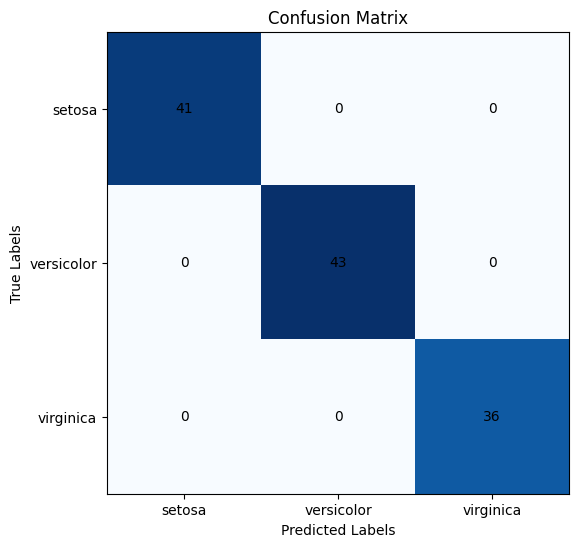

In [290]:
confusion_matrix(Y_test, Y_pred, class_labels=unique_classes)

#### AdamOptimizer

In [291]:
model = SimpleNeuralNetwork(input_size=4, output_size=3, activation_function=relu, activation_function_d=relu_derivative, output_function=softmax)
optimizer = AdamOptimizer(learning_rate=0.1)
trainer = Trainer(model, optimizer, cross_entropy_loss)
trainer.train(X_train, Y_train,X_val,Y_val, epochs=130)

--------------------------------------------------------------------
| Epoch   0 | time:  0.00s | val loss 0.923 | valid accuracy 0.667 |
--------------------------------------------------------------------
| Epoch  10 | time:  0.00s | val loss 0.082 | valid accuracy 0.967 |
--------------------------------------------------------------------
| Epoch  20 | time:  0.00s | val loss 0.020 | valid accuracy 0.992 |
--------------------------------------------------------------------
| Epoch  30 | time:  0.00s | val loss 0.025 | valid accuracy 0.992 |
--------------------------------------------------------------------
| Epoch  40 | time:  0.00s | val loss 0.013 | valid accuracy 0.992 |
--------------------------------------------------------------------
| Epoch  50 | time:  0.00s | val loss 0.012 | valid accuracy 0.992 |
--------------------------------------------------------------------
| Epoch  60 | time:  0.00s | val loss 0.008 | valid accuracy 0.992 |
----------------------------------

In [292]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(X_test, model)
accuracy = np.mean(Y_pred == Y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 1.0


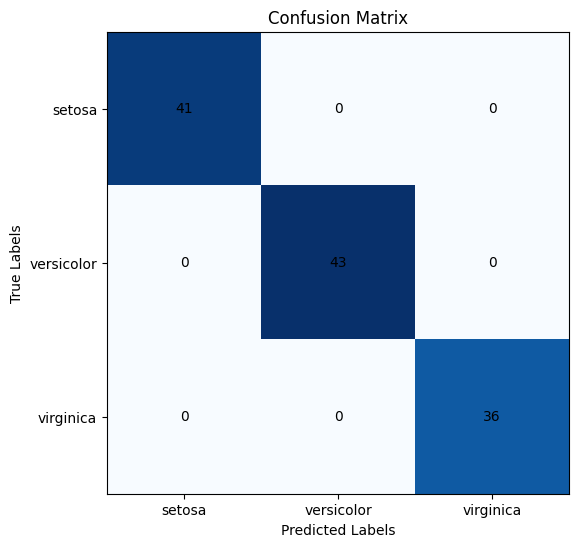

In [293]:
confusion_matrix(Y_test, Y_pred,unique_classes)

## Iris Extended Data

### Load the Data

In [ ]:
data = pd.read_csv('../datos/Iris_extended.csv')
data = np.array(data)

### Label Encoder

In [ ]:
target_column = data[:, 0]

unique_classes, encoded_labels = np.unique(target_column, return_inverse=True)

data[:, 0] = encoded_labels

In [ ]:
target_column = data[:, 2]

data[:, 2] = np.unique(target_column, return_inverse=True)[1]

### Standard Scaler

In [ ]:
features = data[:, 1:].astype(np.float64)

means = features.mean(axis=0)
stds = features.std(axis=0)

scaled_features = (features - means) / stds

data[:, 1:] = scaled_features

### Split Data

In [ ]:
m, n = data.shape
np.random.shuffle(data)

test_size = int(0.1 * m)
data_test = data[:test_size, :].T  # El 10% inicial para el conjunto de prueba

# El conjunto provisional restante (90%)
remaining_data = data[test_size:, :]

train_size = int(0.8 * m)
data_train = remaining_data[:train_size, :].T  # El siguiente 80% para entrenamiento
data_validation = remaining_data[train_size:, :].T  # El resto 10% para validación

X_train, Y_train = data_train[1:].astype(np.float64), data_train[0].astype(int)
X_val, Y_val = data_validation[1:].astype(np.float64), data_validation[0].astype(int)
X_test, Y_test = data_test[1:].astype(np.float64), data_test[0].astype(int)

### Train Data

#### SGDOptimizer

In [ ]:
model = SimpleNeuralNetwork(input_size=20, output_size=3, activation_function=relu, activation_function_d=relu_derivative, output_function=softmax)
optimizer = SGDOptimizer(learning_rate=1)
trainer = Trainer(model, optimizer, cross_entropy_loss)
trainer.train(X_train, Y_train,X_val,Y_val, epochs=130)

--------------------------------------------------------------------
| Epoch   0 | time:  0.00s | val loss 1.098 | valid accuracy 0.325 |
--------------------------------------------------------------------
| Epoch  10 | time:  0.00s | val loss 0.439 | valid accuracy 0.875 |
--------------------------------------------------------------------
| Epoch  20 | time:  0.00s | val loss 0.141 | valid accuracy 0.992 |
--------------------------------------------------------------------
| Epoch  30 | time:  0.00s | val loss 0.087 | valid accuracy 0.992 |
--------------------------------------------------------------------
| Epoch  40 | time:  0.00s | val loss 0.063 | valid accuracy 0.992 |
--------------------------------------------------------------------
| Epoch  50 | time:  0.00s | val loss 0.050 | valid accuracy 0.992 |
--------------------------------------------------------------------
| Epoch  60 | time:  0.00s | val loss 0.042 | valid accuracy 0.992 |
----------------------------------

In [ ]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(X_test, model)
accuracy = np.mean(Y_pred == Y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 1.0


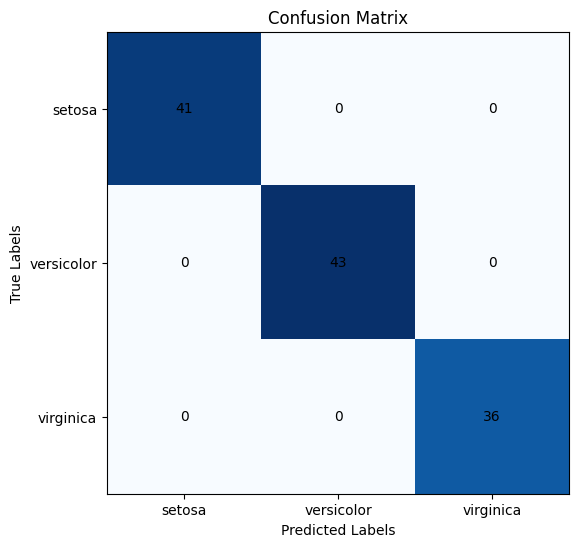

In [ ]:
confusion_matrix(Y_test, Y_pred, class_labels=unique_classes)

#### AdamOptimizer

In [ ]:
model = SimpleNeuralNetwork(input_size=20, output_size=3, activation_function=relu, activation_function_d=relu_derivative, output_function=softmax)
optimizer = AdamOptimizer(learning_rate=0.1)
trainer = Trainer(model, optimizer, cross_entropy_loss)
trainer.train(X_train, Y_train,X_val,Y_val, epochs=130)

--------------------------------------------------------------------
| Epoch   0 | time:  0.00s | val loss 0.923 | valid accuracy 0.667 |
--------------------------------------------------------------------
| Epoch  10 | time:  0.00s | val loss 0.082 | valid accuracy 0.967 |
--------------------------------------------------------------------
| Epoch  20 | time:  0.00s | val loss 0.020 | valid accuracy 0.992 |
--------------------------------------------------------------------
| Epoch  30 | time:  0.00s | val loss 0.025 | valid accuracy 0.992 |
--------------------------------------------------------------------
| Epoch  40 | time:  0.00s | val loss 0.013 | valid accuracy 0.992 |
--------------------------------------------------------------------
| Epoch  50 | time:  0.00s | val loss 0.012 | valid accuracy 0.992 |
--------------------------------------------------------------------
| Epoch  60 | time:  0.00s | val loss 0.008 | valid accuracy 0.992 |
----------------------------------

In [ ]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(X_test, model)
accuracy = np.mean(Y_pred == Y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 1.0


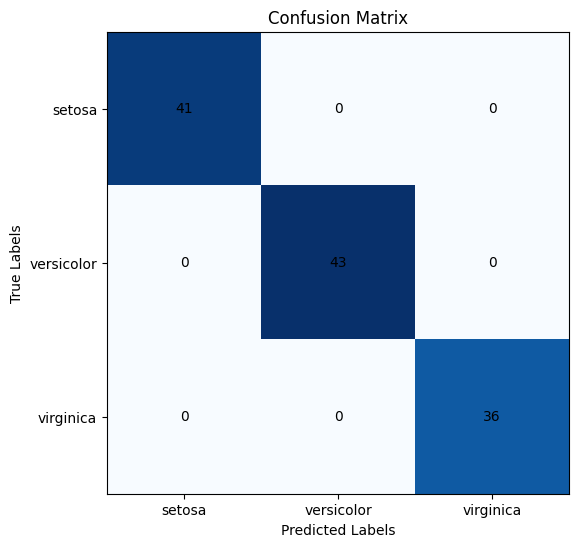

In [ ]:
confusion_matrix(Y_test, Y_pred,unique_classes)